# Final Notebook

## Introduction

##### For this project, we were required to find some metric that would determine the best neighborhood in Pittsburgh. Our approach to finding our metric was to orignially come up with ideas and then find datasets that applied. Our first idea was "best neighborhood to have a glow-up" or "best neighborhood to be an athlete" However, this proposed to be a challenge because the datasets are limited in what they cover. We struggled to find datasets that were applicable to these metrics. While looking through the datasets, we did notice that there is a lot of data on traffic and roadways in Pittsburgh neighborhoods. For this reason, we knew we wanted to do something with this information, but also for our metric to be intersting. That is how we decided on our metric "best neighborhood to film Cars 4". 

## Metric

##### As mentioned above, our metric is "best neighborhood to film Cars 4". The sub-metrics we are measuring include number of speed bumps, number of traffic lights, and number of bridges per neighborhood. In our idea of Cars 4, there should be the least number of speed bumps and traffic lights, but more bridges. For these reasons, we are reviewing datasets that cover speed bumps, traffic lights, and city bridges.

## Dataset #1 Speed Bumps - Nora

##### When driving, speed bumps require drivers to slow down. However, in the Cars movies, Lightning McQueen is a "Faster than fast and quicker than quick". He has no time to slow down for speed bumps. For this reason, the best neighborhood should have the least number of speed bumps. 

In [2]:
import pandas as pd

In [3]:
#import humps dataset
humps = pd.read_csv("humps.csv")
counts = humps['neighborhood'].value_counts()
counts

Squirrel Hill South    18
Carrick                 9
Polish Hill             6
North Oakland           6
Upper Hill              4
Brookline               4
Homewood South          4
South Side Slopes       4
Perry North             4
Garfield                3
Squirrel Hill North     3
South Side Flats        3
Mount Washington        3
Bloomfield              3
Highland Park           2
Central Oakland         1
Stanton Heights         1
Overbrook               1
Name: neighborhood, dtype: int64

##### This list above ranks the neighborhoods from most number of speed bumps to least number of speed bumps. Although this information is helpful, it is important to consider the square area of each neighborhood. For example, Squirrel Hill South could have the most speed bumps, but it could also be the largest neighborhood. We want Lightning McQueen to be able to drive the farthest distance without having to slow down for speed bumps. So, it is important to take into account the size of each neighborhood.

In [105]:
#import neighborhood dataset to find square area
hood_one = pd.read_csv("hood.csv")

                     Humps Per Square Mile
Overbrook                         1.195461
Stanton Heights                   1.354667
Highland Park                     1.709606
Brookline                         1.914856
Squirrel Hill North               2.452165
Mount Washington                  2.648935
South Side Flats                  3.245641
Perry North                       3.306023
Central Oakland                   3.570835
Bloomfield                        4.273927
Carrick                           5.390739
South Side Slopes                 5.532043
Garfield                          6.559032
Squirrel Hill South               6.724936
Homewood South                   10.331962
North Oakland                    12.072386
Upper Hill                       12.771846
Polish Hill                      23.422473


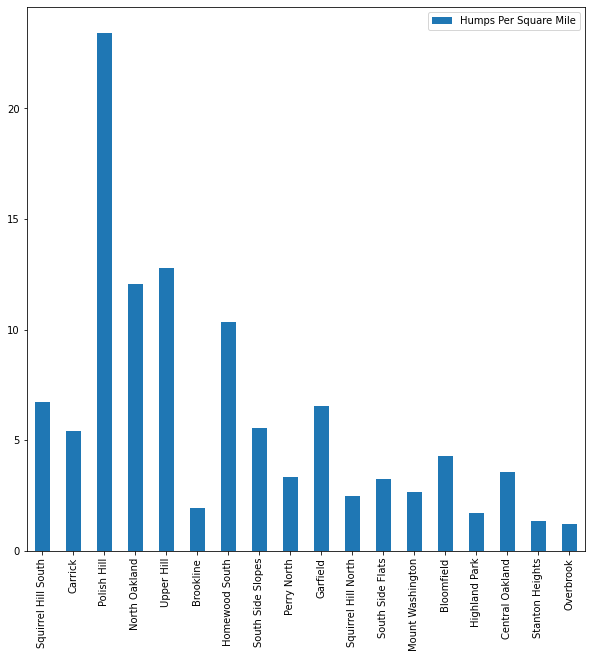

In [133]:
#create a dictionary of the total count of speed bumbs per neighborhood
neighborhoods = counts.to_dict()

#iterate through the dictionary to divide each count by the neighborhood's area
for index, row in hood_one.iterrows():
    area = row['sqmiles']
    hood = row['hood']
    if hood in neighborhoods:
        neighborhoods[hood] = neighborhoods[hood]/area
        
#turn dictionary back into a data frame
hood_area = pd.DataFrame(neighborhoods, index=[0])
hood_area = hood_area.transpose()
hood_area.columns=["Humps Per Square Mile"]

#print sorted dictionary
print(hood_area.sort_values(by="Humps Per Square Mile"))
#represent data frame as a bar plot
hood_area.plot(kind='bar', rot=90, figsize=(10, 10))

## Dataset #1 Conclusion
##### As you can see, after dividing each neighborhood's total number of speed bumbs by its square area, Overbrook reveals to be the least speed bump dense neighborhood. Thus, Overbrook is considered to be the best option to film Cars 4 based on a lack of speed bumps, allowing the charactes to speed.

## Dataset #2 Traffic Lights - Layla

##### We all know how frustrating it is when a race has to stop due to traffic lights. Therefore, the ideal neighborhood for racing would be the one with the least number of traffic lights. Choosing a neighborhood with fewer traffic lights not only ensures uninterrupted racing sequences but also allows for a seamless flow, enabling drivers to showcase their skills to the fullest. This will captivate the audience and immerse them in the thrill of the race from start to finish.

In [5]:
import geopandas

In [6]:
#import Traffic Lights dataset
TrafficLights = pd.read_csv('TrafficLights.csv')
counts = TrafficLights['neighborhood'].value_counts()

counts.to_frame()
counts= counts.reset_index()
counts

,index,neighborhood
0,South Side Flats,3672
1,Bloomfield,3627
2,Central Business District,3491
3,Shadyside,3370
4,Squirrel Hill South,3281
...,...,...
86,Ridgemont,62
87,Chartiers City,44
88,Glen Hazel,38
89,Arlington Heights,21


In [7]:
hood = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/neighborhoods.zip")
# do the merge
trafficlights_map = hood.merge(counts, how='left', left_on='hood', right_on='index')

In [8]:
# Importing square area to calculate proportion
trafficlights_map['proportion']= trafficlights_map['neighborhood']/ trafficlights_map['sqmiles']
trafficlights_map

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,index,neighborhood,proportion
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417067e+06,14181.728584,"POLYGON ((-79.90531 40.45549, -79.90488 40.455...",Point Breeze North,608,2013.773882
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410837e+07,30326.819418,"POLYGON ((-79.92063 40.44423, -79.92052 40.443...",Squirrel Hill North,1895,1548.950932
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426328,"POLYGON ((-79.93546 40.47257, -79.93530 40.472...",Garfield,848,1854.019693
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897519e+06,13941.514356,"POLYGON ((-79.96601 40.45520, -79.96595 40.454...",Bedford Dwellings,129,734.313443
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353046e+06,12021.860516,"POLYGON ((-79.98819 40.41852, -79.98824 40.418...",Knoxville,750,2503.131835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,215,42,003,141000,1,420031410001,Block Group 1,G5030,S,...,2020-08-14,None,5362860.0,93ce438e-e3ec-410d-a7fd-619646e25dc3,5.470266e+06,15761.679800,"POLYGON ((-79.89711 40.42762, -79.89663 40.427...",Regent Square,308,1569.676300
86,87,211,42,003,051100,1,420030511001,Block Group 1,G5030,S,...,2020-08-14,None,9529806.0,2858633a-175e-459b-a4c9-9aac92bfe033,9.050536e+06,17830.507786,"POLYGON ((-79.95848 40.44846, -79.95872 40.448...",Terrace Village,306,942.571868
87,88,153,42,003,562600,2,420035626002,Block Group 2,G5030,S,...,2020-08-14,None,16904768.0,fbc3ab11-0429-476e-80fd-700f969b204a,1.689127e+07,21714.648283,"POLYGON ((-80.03619 40.45073, -80.03496 40.449...",Elliott,547,902.803573
88,89,16,42,003,170200,1,420031702001,Block Group 1,G5030,S,...,2020-08-14,None,26083320.0,39308990-70d5-4da6-b2a0-a5510f18e9b9,2.576841e+07,34700.371969,"POLYGON ((-79.97726 40.43274, -79.97725 40.432...",South Side Flats,3672,3972.664348


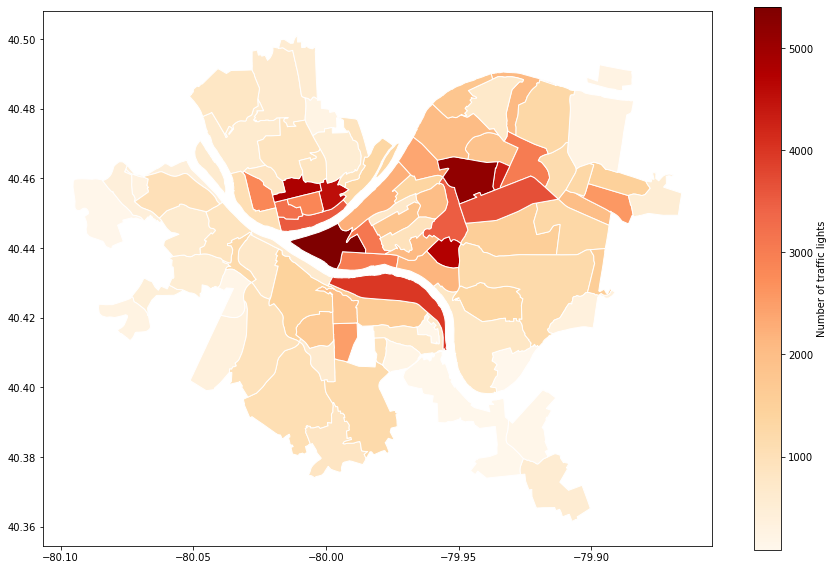

In [9]:
# Plotting a map
trafficlights_map.plot(column='proportion', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of traffic lights"}, # label the legend
               figsize=(15, 10)         # set the size
               )

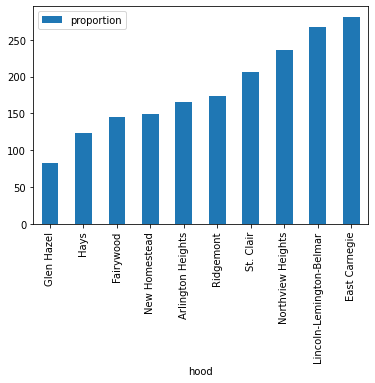

In [12]:
# Plotting a bar chart
trafficlights_map= trafficlights_map[['hood', 'proportion']]

# neighborhoods with lowest proportions
trafficlights_map = trafficlights_map.sort_values(by='proportion',ascending=True)
trafficlights_map.head(10).plot(kind='bar', x='hood')

## Dataset #2 Conclusion


##### According to our calculations, the neighborhood with the fewest traffic lights relative to its area is "**Glen Hazel**". Therefore, it would be the best neghborhood to film Cars 4 based on traffic lights proportions.

## Dataset #3 Scenic Route (Bridges) - Nora

##### Cinematography is crucial for making or breaking a movie. For this reason, it is very important that the filming location of Cars 4 is scenic and offers great filming locations. The most scenic and car accessible feature of Pittsburgh is its many bridges. The next dataset records the number of bridges in each neighborhood in Pittsburgh. The neighborhood with the most bridges will be the best for filming Cars 4.

In [110]:
bridge = pd.read_csv("bridge.csv")
bridge_counts = bridge['neighborhood'].value_counts()
bridge_counts

Squirrel Hill South          14
Central Business District    12
Troy Hill                     7
Overbrook                     6
Hays                          6
Shadyside                     6
Oakwood                       5
South Side Slopes             5
South Side Flats              5
West End                      4
South Oakland                 4
Mount Washington              4
East Allegheny                4
Hazelwood                     4
Bon Air                       3
Larimer                       3
Allegheny Center              3
Sheraden                      3
Polish Hill                   3
Bloomfield                    2
Bluff                         2
Perry South                   2
Lincoln-Lemington-Belmar      2
Swisshelm Park                2
Windgap                       2
Highland Park                 2
Squirrel Hill North           2
Arlington                     2
Allegheny West                2
Greenfield                    2
Marshall-Shadeland            2
East Lib

##### Again, this list above ranks the neighborhoods from most number of bridges to least number of bridges. It is important to consider the square area of each neighborhood. For example, Squirrel Hill South could have the most bridges, but it could also be the largest neighborhood. We want Lightning McQueen to be able to drive the least distance in order to get from one bridge to the next. So, it is important to take into account the size of each neighborhood.

In [108]:
#import neighborhood dataset to find square area
hood_two = pd.read_csv("hood.csv")

                           Bridges Per Square Mile
West End                                 20.558597
Oakwood                                  19.811177
Central Business District                18.586440
East Allegheny                           17.027396
Troy Hill                                15.187209
Allegheny Center                         14.358407
Allegheny West                           13.812698
Polish Hill                              11.711237
Bon Air                                   9.528939
South Oakland                             8.265173
Overbrook                                 7.172767
South Side Slopes                         6.915054
Larimer                                   6.738788
Shadyside                                 6.520598
Bluff                                     6.148904
South Side Flats                          5.409401
Squirrel Hill South                       5.230506
Regent Square                             5.096352
Windgap                        

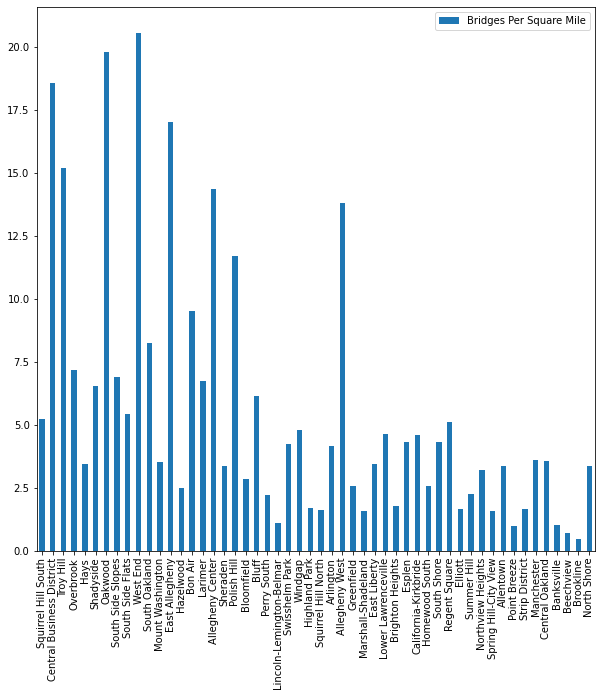

In [135]:
#create a dictionary of the total count of bridges per neighborhood
neighborhoods = bridge_counts.to_dict()

#iterate through the dictionary to divide each count by the neighborhood's area
for index, row in hood_two.iterrows():
    area = row['sqmiles']
    hood = row['hood']
    if hood in neighborhoods:
        neighborhoods[hood] = neighborhoods[hood]/area
        
#turn dictionary back into a data frame
bridge_area = pd.DataFrame(neighborhoods, index=[0])
bridge_area = bridge_area.transpose()
bridge_area.columns=["Bridges Per Square Mile"]

#print sorted dictionary
print(bridge_area.sort_values(by="Bridges Per Square Mile", ascending=False))

#represent data frame as a bar plot
bridge_area.plot(kind='bar', rot=90, figsize=(10, 10))

## Dataset #3 Conclusion
##### As you can see, after dividing each neighborhood's total number of brides by its square area, West End reveals to be the most bridge bump dense neighborhood. Thus, West End is considered to be the best option to film Cars 4 based on the most bridges aka scenic routes.

## Combining All Sub-Metrics

##### In order to determine the best overall neighborhood to film Cars 4, we have to combine all sub-metrics. In order to do this, we decided to calculate the total number of speed bumps, traffic lights, and bridges per neighborhood and calculate the total per square area. However, because we want to calcuate the least number of speed bumps and traffic lights, we will consider their counts to be negative. So, essentially, we are subtracting the number of speed bumps and traffic lights away from the total number of bridges per neighborhood. Then we will calcualate this area per square area. 

## Conclusion - Nora

write conclusion here.

## Conclusion - Layla

write conclusion here.